In [1]:
from utilities import time_evolve
from construct_H_tree import construct_H_tree
from Species import Ca40
from structures import Laser, Chain
from Chamber import Chamber
import numpy as np
from math import sqrt

ion = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])

chain = Chain([ion], trap_freqs=[3e6, 3e6, 1e6], selected_modes=[])

mode = chain.modes[-1]
mode.modecutoff(4)

chain.selected_modes = [mode] # consider one mode

laser = Laser(phi=0, k_hat=np.array([1,0,1])/sqrt(2), eps_hat = np.array([1, 0, -1])/sqrt(2))

chamber = Chamber(chain = chain, lasers = [laser], 
                B = 4e-4, Bhat = np.array([0,0,1]))

chamber.set_laser_wavelength_from_transition(0, ion.transition(("S", "D")))
chamber.set_laser_intensity_from_pi_time(0, 2e-6, ion.transition(("S", "D")))

timescale = 1e-6

# Red sideband
laser.detune(-mode.eigenfreq)

H_red = construct_H_tree(chamber, timescale)
H_red.apply_ld_and_rwa_approximations(n_cutoff = mode.N, ld_cond_th = 1e-2,  rwa_cutoff='inf')

# Blue sideband
laser.detune(mode.eigenfreq)

H_blue = construct_H_tree(chamber, timescale)
H_blue.apply_ld_and_rwa_approximations(n_cutoff = mode.N, ld_cond_th = 1e-2, rwa_cutoff='inf')


Expanding to 2nd order in the Lamb-Dicke approximation
Expanding to 2nd order in the Lamb-Dicke approximation


10.0%. Run time:   0.38s. Est. time left: 00:00:00:03
20.0%. Run time:   0.70s. Est. time left: 00:00:00:02
30.0%. Run time:   1.02s. Est. time left: 00:00:00:02
40.0%. Run time:   1.33s. Est. time left: 00:00:00:01
50.1%. Run time:   1.64s. Est. time left: 00:00:00:01
60.1%. Run time:   1.95s. Est. time left: 00:00:00:01
70.1%. Run time:   2.26s. Est. time left: 00:00:00:00
80.1%. Run time:   2.57s. Est. time left: 00:00:00:00
90.1%. Run time:   2.89s. Est. time left: 00:00:00:00
100.0%. Run time:   3.19s. Est. time left: 00:00:00:00
Total run time:   3.19s
10.0%. Run time:   0.17s. Est. time left: 00:00:00:01
20.0%. Run time:   0.33s. Est. time left: 00:00:00:01
30.0%. Run time:   0.50s. Est. time left: 00:00:00:01
40.0%. Run time:   0.66s. Est. time left: 00:00:00:00
50.1%. Run time:   0.82s. Est. time left: 00:00:00:00
60.1%. Run time:   0.98s. Est. time left: 00:00:00:00
70.1%. Run time:   1.15s. Est. time left: 00:00:00:00
80.1%. Run time:   1.31s. Est. time left: 00:00:00:00
90.

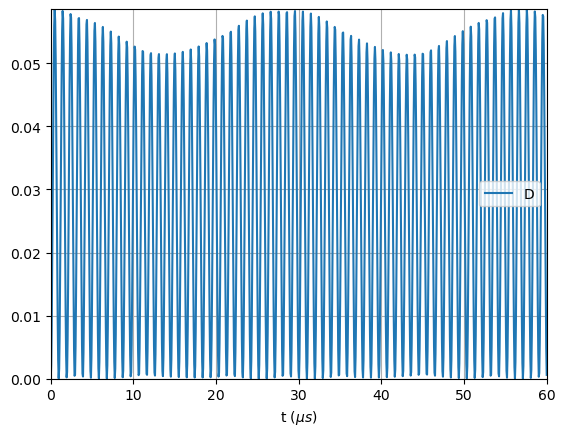

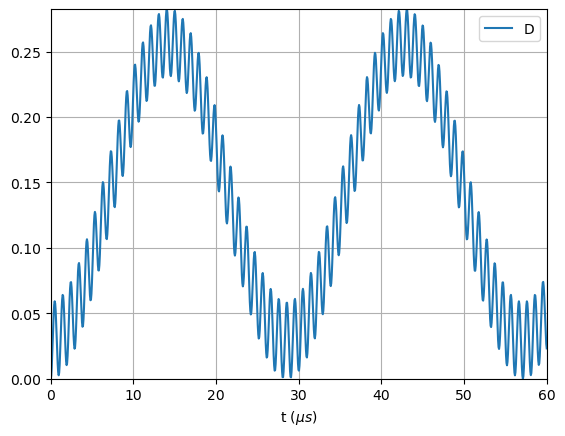

In [2]:
from qutip import tensor
duration  = 60
times = np.linspace(0, duration,  1000)

psi_ion = ion.state["S"]
psi_mot = mode.setstate(0)

psi_0 = tensor(psi_ion, psi_mot)

Omega = np.pi/(2e-6/timescale)


op = chain.ion_projector(1, "D")

results_red = time_evolve(H_red, psi_0, times, expt_ops=[op], progress_bar= True)

results_blue = time_evolve(H_blue, psi_0, times, expt_ops=[op], progress_bar= True)

results_red.quick_plot()
results_blue.quick_plot()


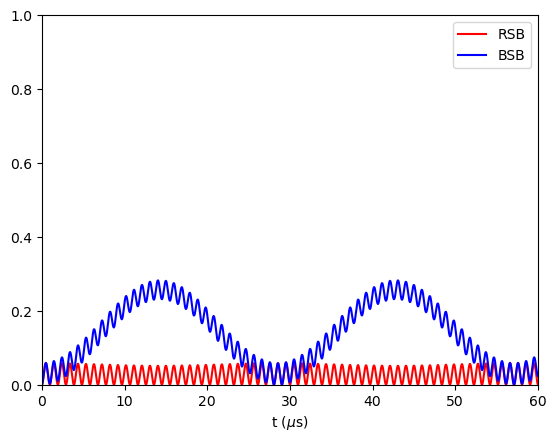

In [3]:
import matplotlib.pyplot as plt

plt.plot(times, results_red.expectation_values['D'], c = 'r', label = 'RSB')
plt.plot(times, results_blue.expectation_values['D'], c = 'b', label = 'BSB')
plt.ylim(0,1)
plt.xlim(0, duration)
plt.legend()
plt.xlabel(r't $(\mu$s)')
plt.show()